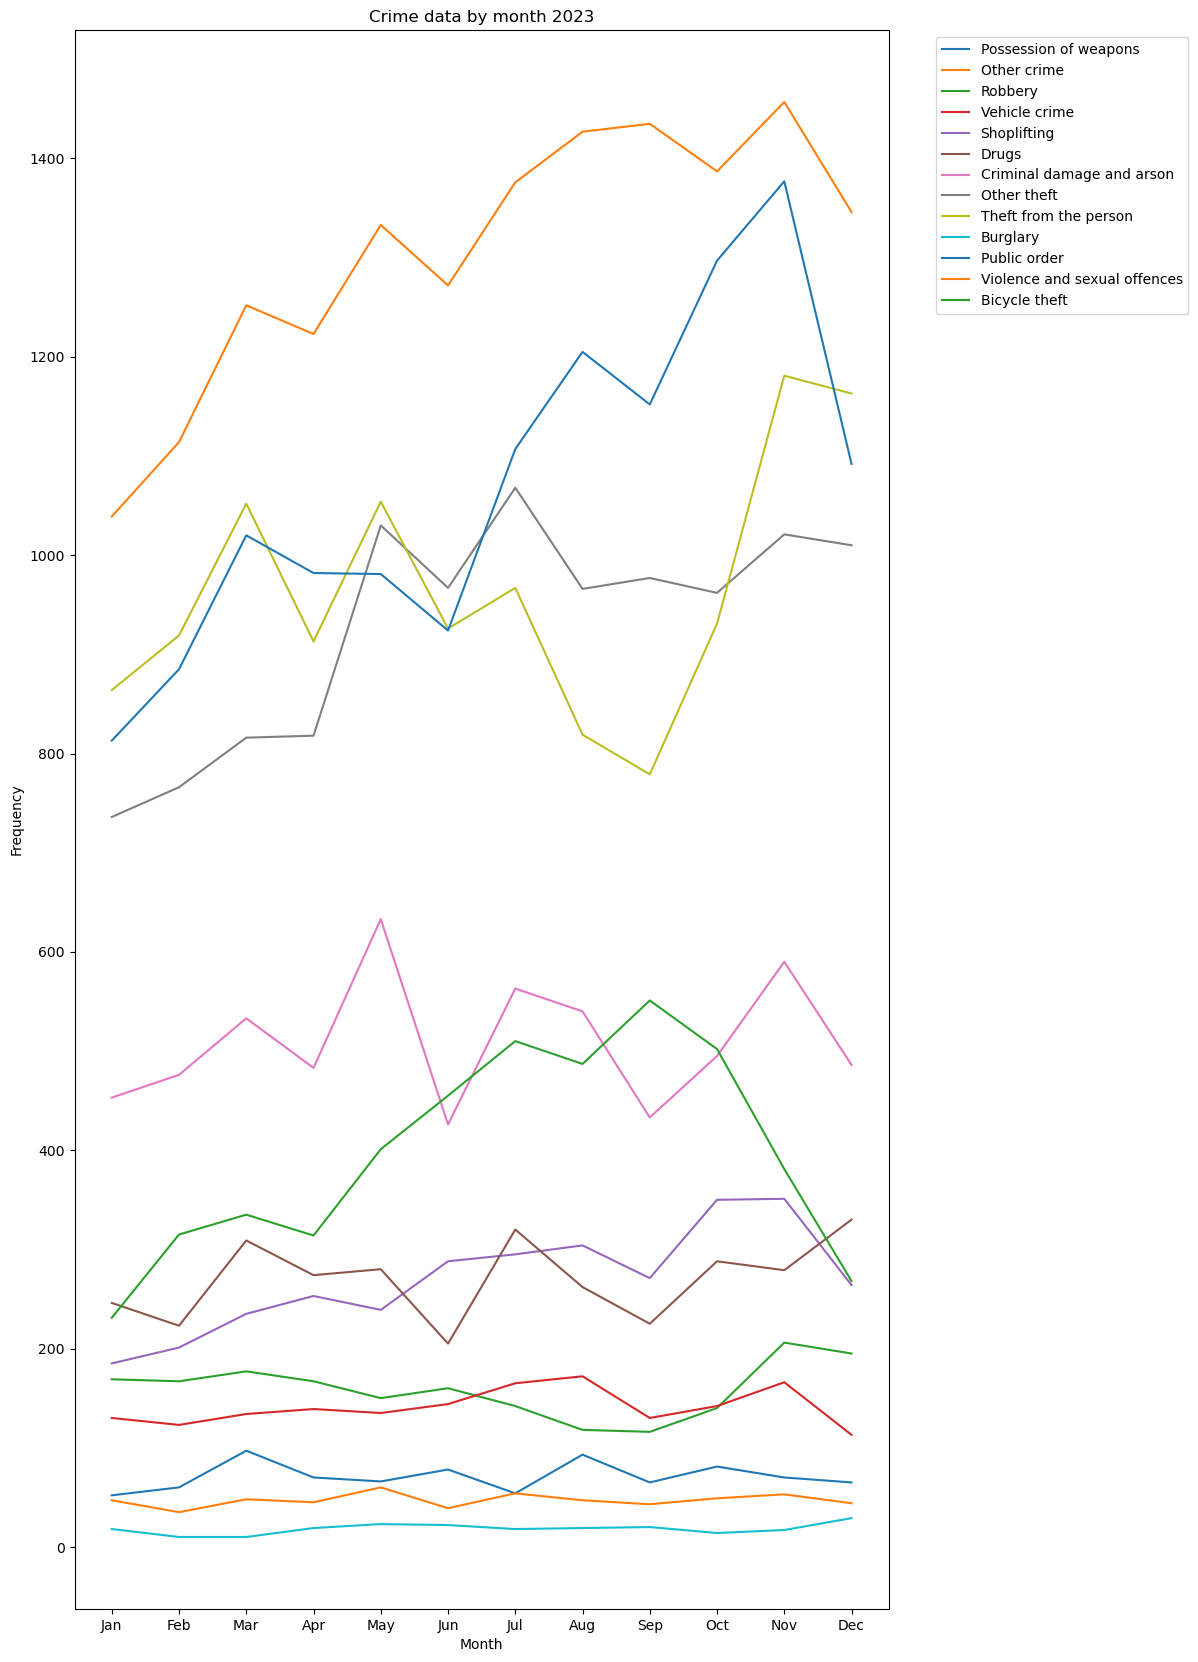

In [2]:
# Imports relevant modules
import os
import pandas as pd
import glob
import matplotlib.pyplot as plt

# Intialises the root file directory and stores files with the extension ".csv" in the root directory/sub directories in 
# the dir_list variable
path = "C:/Users/aslan/OneDrive - University of Surrey/Lab_ENG0020/Coursework/"
dir_list = glob.glob(os.path.join(path, "**/*.csv"), recursive=True)

# Iterates through the dir_list list (csv files) and reads the data in these files storing it in the crime_data variable
# and appending this data to the data_list list. Then it concatenates the data in data_list into the "frame" data frame.

data_list = []

for file_path in dir_list:
    crime_data = pd.read_csv(file_path)
    data_list.append(crime_data)

frame = pd.concat(data_list)

# Initialises arrays for the months and crime types
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
crimes = ["Possession of weapons", "Other crime", "Robbery", "Vehicle crime", "Shoplifting", "Drugs", "Criminal damage and arson", "Other theft", "Theft from the person", "Burglary", "Public order", "Violence and sexual offences", "Bicycle theft"]
crimes_freq3_lst = []

# For each crime type in the crimes list, it iterates through the data_list (where each index is a month of data) and appends
# the frequency of that crime type for that index (month) to the crimes_freq3 list. One it has iterated fully through the 
# data_list (months), these frequencies for that crime type are appended to the crimes_freq3_lst (2D array) and the outer 
# for loop iterates to the next index (crime type) re-inialising the crimes_freq3 list as an empty list to get rid of the
# previous frequencies for the previous crime type.
for crime_type in crimes:
    crimes_freq3 = []
    for i in data_list:
        total_freq = i[(i["Crime type"] == crime_type)]
        crimes_freq3.append(total_freq.shape[0])
    crimes_freq3_lst.append(crimes_freq3)

# crimes_freq3_lst is turned into a dataframe with the list being passed as a parameter into the crimes_freq3_df initialisation
# along with the columns being declared as the months list
crimes_freq3_df = pd.DataFrame(crimes_freq3_lst,
                             columns = months)

# Here the figure of the crime frequencies for each crime type across all 12 months are plotted on a single figure with the 
# figure size, title, x and y axis labels and legend being initialised
plt.figure(figsize=(10.5, 20.5))
plt.title("Crime data by month 2023")
plt.xlabel("Month")
plt.ylabel("Frequency")

for i in range(0, 13):
    plt.plot(crimes_freq3_df.loc[i])

plt.legend(crimes, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

#plt.yticks(10)
